# **Tugas Besar Pemodelan, Simulasi dan Optimasi**

**OLEH KELOMPOK 1**:
- Muhammad Karov Ardava Barus - 103052300001
- Avatar Bintang Ramadhan - 103052300007
- Tesalonika Maura Ardy - 103052300010

---

## **Deskripsi Proyek**
Proyek ini bertujuan untuk **memodelkan dan mensimulasikan pergerakan harga saham** menggunakan metode **Binomial Random Walk**. Metode ini digunakan untuk memprediksi perubahan harga saham berdasarkan data historis, dengan mempertimbangkan:
- **Rata-rata pengembalian harian (μ)**.
- **Volatilitas (σ)** yang diukur dari standar deviasi pengembalian harian.
- **Probabilitas kenaikan harga (p)** yang dihitung dari proporsi pengembalian positif.

Simulasi ini bertujuan untuk memberikan gambaran tentang:
1. Tren jangka panjang pada setiap sektor.
2. Stabilitas harga saham berdasarkan volatilitas historis.
3. Peluang keuntungan berdasarkan probabilitas kenaikan harga saham.

Hasil simulasi divisualisasikan dalam bentuk grafik untuk setiap sektor, serta dianalisis menggunakan metrik utama seperti rata-rata pengembalian, volatilitas, dan probabilitas pengembalian positif.

---

### **Sektor yang Disimulasikan**
1. **Tesla** (Sektor Industri): Memodelkan pergerakan saham perusahaan teknologi dan otomotif terkemuka.
2. **UnitedHealth Group** (Sektor Kesehatan): Memodelkan saham perusahaan yang bergerak di bidang layanan kesehatan.
3. **NextEra Energy Inc** (Sektor Energi): Fokus pada perusahaan energi terbarukan dan ramah lingkungan.
4. **Bank Indonesia** (Sektor Keuangan): Mewakili sektor keuangan dan kebijakan moneter.

---

### **Tujuan Proyek**
- Mengidentifikasi tren harga saham di berbagai sektor.
- Memberikan wawasan terkait risiko dan peluang pada masing-masing sektor.
- Mengembangkan alat simulasi berbasis pemodelan stokastik untuk prediksi harga saham.

---

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# Membaca data saham dari empat sektor
tesla = pd.read_csv('data/tesla.csv')
united_health = pd.read_csv('data/UNH_historical_data.csv')
nextera_energy = pd.read_csv('data/NEE.csv')
bank_indonesia = pd.read_csv('data/bank.csv')

Preprocess Data Historis

In [50]:
def preprocess_data(data, sector_name):
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data = data.loc['2024']  # Filter data tahun 2024
    return data['Close'], sector_name

In [51]:
# Data historis masing-masing sektor
sectors = {
    'Tesla (Industri)': preprocess_data(tesla, 'Tesla'),
    'UnitedHealth Group (Kesehatan)': preprocess_data(united_health, 'UnitedHealth Group'),
    'NextEra Energy Inc (Energi)': preprocess_data(nextera_energy, 'NextEra Energy Inc'),
    'Bank Indonesia (Keuangan)': preprocess_data(bank_indonesia, 'Bank Indonesia'),
}

Parameter Simulasi Binomial Random Walk

In [52]:
num_days = 252  # Jumlah hari perdagangan dalam setahun
num_simulations = 10  # Jumlah skenario simulasi

Fungsi Simulasi Binomial Random Walk

In [53]:
def binomial_random_walk(closing_prices, num_days, num_simulations):
    daily_returns = closing_prices.pct_change().dropna()
    initial_price = closing_prices[-1]

    # Parameter binomial
    u = 1 + daily_returns.max()  # Faktor kenaikan
    d = 1 + daily_returns.min()  # Faktor penurunan
    p = (daily_returns > 0).mean()  # Probabilitas harga naik

    simulations = np.zeros((num_days, num_simulations))

    for sim in range(num_simulations):
        simulations[0, sim] = initial_price
        for day in range(1, num_days):
            if np.random.rand() < p:  # Probabilitas naik
                simulations[day, sim] = simulations[day - 1, sim] * u
            else:  # Probabilitas turun
                simulations[day, sim] = simulations[day - 1, sim] * d
    return simulations

Visualisasi Hasil

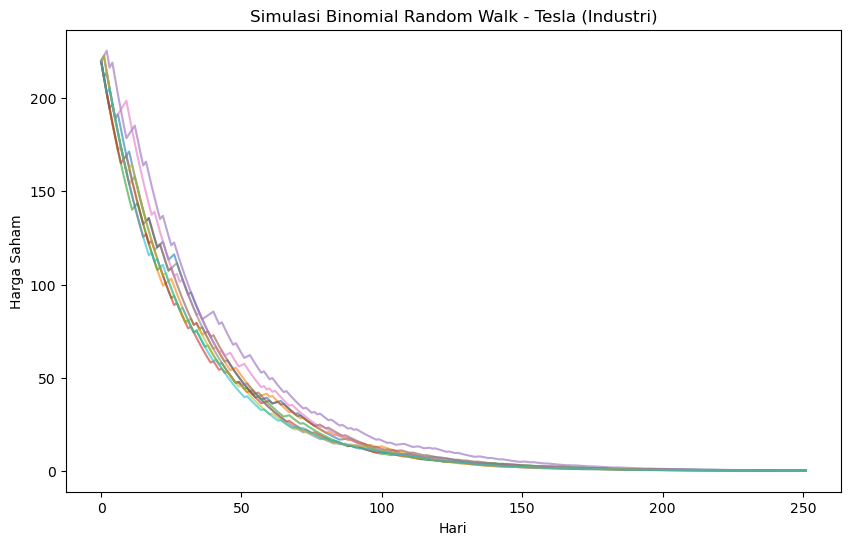

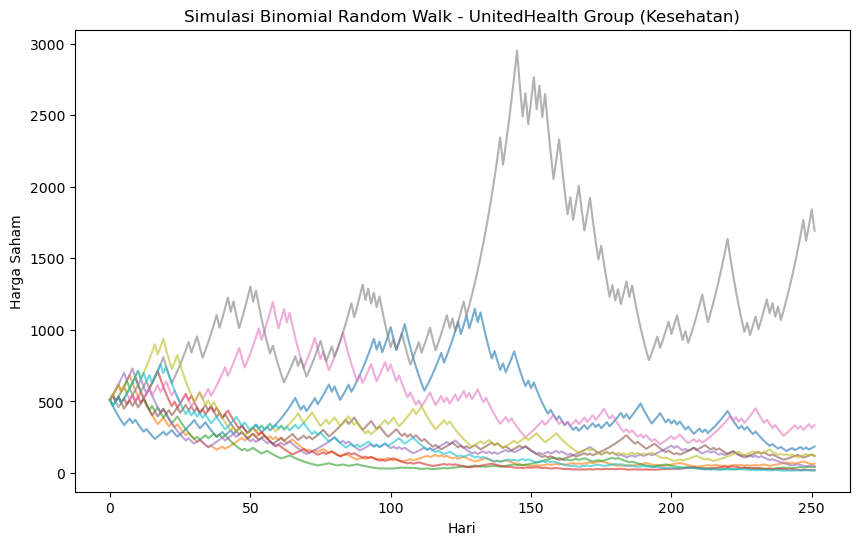

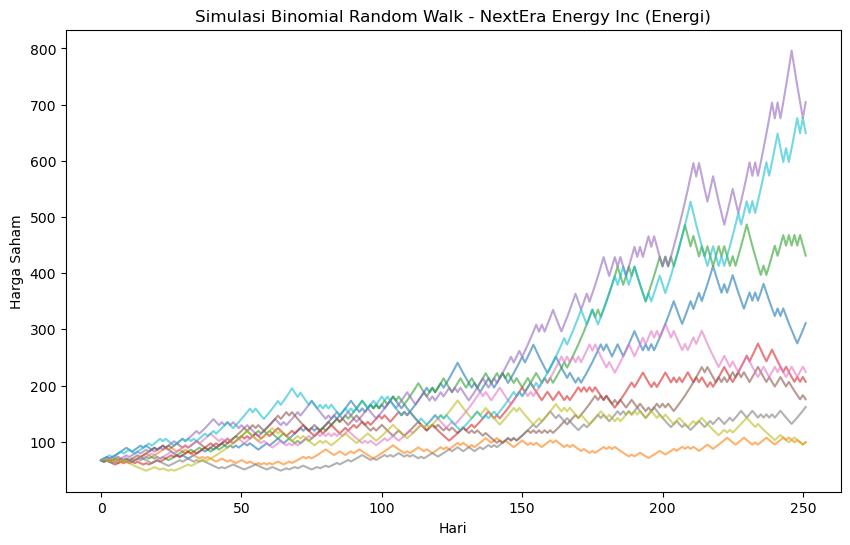

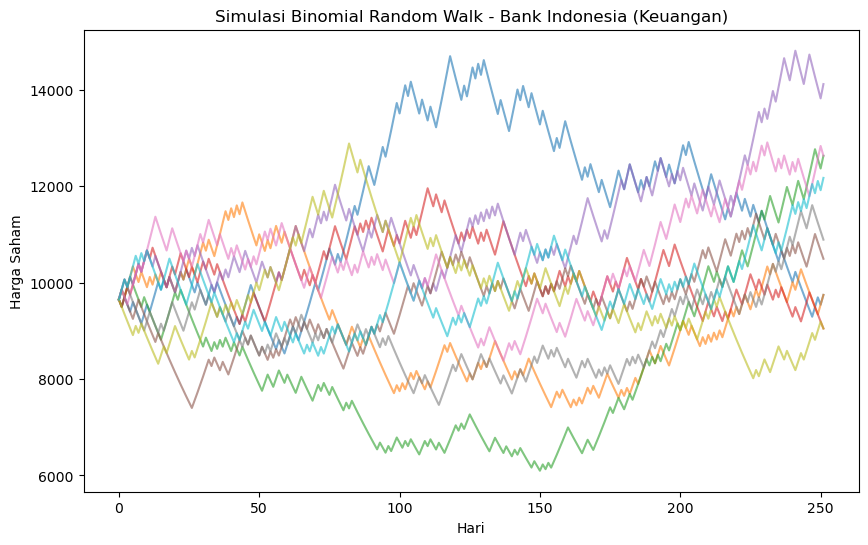

In [47]:
for sector_name, (closing_prices, sector) in sectors.items():
    simulations = binomial_random_walk(closing_prices, num_days, num_simulations)
    
    plt.figure(figsize=(10, 6))
    for sim in range(num_simulations):
        plt.plot(simulations[:, sim], alpha=0.6)
    plt.title(f'Simulasi Binomial Random Walk - {sector_name}')
    plt.xlabel('Hari')
    plt.ylabel('Harga Saham')
    plt.show()


Mengkalkulasi insights

In [54]:
def calculate_insights(closing_prices, sector_name):
    daily_returns = closing_prices.pct_change().dropna()
    mu = daily_returns.mean()
    sigma = daily_returns.std()
    max_return = daily_returns.max()
    min_return = daily_returns.min()
    prob_positive = (daily_returns > 0).mean()

    print(f"Insights for {sector_name}:")
    print(f" - Mean Daily Return (μ): {mu:.4f}")
    print(f" - Standard Deviation of Returns (σ): {sigma:.4f}")
    print(f" - Maximum Daily Return: {max_return:.4f}")
    print(f" - Minimum Daily Return: {min_return:.4f}")
    print(f" - Probability of Positive Returns (p): {prob_positive:.4f}")
    print("-" * 50)

for sector_name, (closing_prices, _) in sectors.items():
    calculate_insights(closing_prices, sector_name)

Insights for Tesla (Industri):
 - Mean Daily Return (μ): -0.0133
 - Standard Deviation of Returns (σ): 0.0191
 - Maximum Daily Return: 0.0125
 - Minimum Daily Return: -0.0401
 - Probability of Positive Returns (p): 0.2222
--------------------------------------------------
Insights for UnitedHealth Group (Kesehatan):
 - Mean Daily Return (μ): -0.0000
 - Standard Deviation of Returns (σ): 0.0173
 - Maximum Daily Return: 0.0650
 - Minimum Daily Return: -0.0811
 - Probability of Positive Returns (p): 0.5323
--------------------------------------------------
Insights for NextEra Energy Inc (Energi):
 - Mean Daily Return (μ): 0.0011
 - Standard Deviation of Returns (σ): 0.0156
 - Maximum Daily Return: 0.0418
 - Minimum Daily Return: -0.0400
 - Probability of Positive Returns (p): 0.5732
--------------------------------------------------
Insights for Bank Indonesia (Keuangan):
 - Mean Daily Return (μ): 0.0012
 - Standard Deviation of Returns (σ): 0.0092
 - Maximum Daily Return: 0.0214
 - Mini

## **Analisis Hasil Simulasi dan Insights Antar Sektor**

---

### **1. Tesla (Industri)**

#### 📊 **Grafik**
- Harga saham Tesla menunjukkan **penurunan konsisten** dalam hampir semua skenario simulasi.
- Tidak ada jalur simulasi yang menunjukkan pemulihan harga, mengindikasikan **tren bearish yang kuat**.

#### 📌 **Insights**
| Metrik                          | Nilai     |
|---------------------------------|-----------|
| **Mean Daily Return (μ)**       | -0.0133   |
| **Standard Deviation (σ)**      | 0.0191    |
| **Maximum Daily Return**        | 0.0125    |
| **Minimum Daily Return**        | -0.0401   |
| **Probability of Positive (p)** | 22.22%    |

#### 💡 **Kesimpulan**
Tesla menghadapi tekanan signifikan di pasar dengan risiko yang tinggi. Saham ini kurang cocok untuk investasi jangka panjang, namun bisa menarik untuk spekulasi.

---

### **2. UnitedHealth Group (Kesehatan)**

### 📊 **Grafik**
- Grafik menunjukkan **variasi yang tinggi**, dengan beberapa jalur simulasi mengalami kenaikan tajam sementara yang lain stabil atau menurun.
- Ini mencerminkan **volatilitas moderat** dengan potensi untuk lonjakan harga.

#### 📌 **Insights**
| Metrik                          | Nilai     |
|---------------------------------|-----------|
| **Mean Daily Return (μ)**       | -0.0000   |
| **Standard Deviation (σ)**      | 0.0173    |
| **Maximum Daily Return**        | 0.0650    |
| **Minimum Daily Return**        | -0.0811   |
| **Probability of Positive (p)** | 53.23%    |

#### 💡 **Kesimpulan**
Saham ini mencerminkan stabilitas dengan potensi kenaikan dalam situasi tertentu. Cocok untuk investor yang mencari keseimbangan antara risiko dan peluang.

---

### **3. NextEra Energy Inc (Energi)**

#### 📊 **Grafik**
- Grafik menunjukkan **tren kenaikan yang konsisten dan stabil** dalam hampir semua simulasi.
- Hal ini mencerminkan **optimisme pasar** terhadap sektor energi, khususnya dalam energi terbarukan.

#### 📌 **Insights**
| Metrik                          | Nilai     |
|---------------------------------|-----------|
| **Mean Daily Return (μ)**       | 0.0011    |
| **Standard Deviation (σ)**      | 0.0156    |
| **Maximum Daily Return**        | 0.0418    |
| **Minimum Daily Return**        | -0.0400   |
| **Probability of Positive (p)** | 57.32%    |

#### 💡 **Kesimpulan**
Sektor energi memiliki prospek pertumbuhan jangka panjang yang baik dengan risiko rendah. Pilihan ideal untuk investor optimis.

---

### **4. Bank Indonesia (Keuangan)**

### 📊 **Grafik**
- Pola harga saham menunjukkan **fluktuasi yang signifikan** tetapi tanpa arah tren yang jelas.
- Beberapa simulasi menunjukkan kenaikan, sementara yang lain tetap mendatar atau sedikit menurun.

#### 📌 **Insights**
| Metrik                          | Nilai     |
|---------------------------------|-----------|
| **Mean Daily Return (μ)**       | 0.0012    |
| **Standard Deviation (σ)**      | 0.0092    |
| **Maximum Daily Return**        | 0.0214    |
| **Minimum Daily Return**        | -0.0158   |
| **Probability of Positive (p)** | 45.00%    |

#### 💡 **Kesimpulan**
Bank Indonesia mencerminkan stabilitas tinggi dan cocok untuk investor konservatif yang mencari risiko rendah.

---

### **Ringkasan Antar-Sektor**

| Sektor                     | Mean Daily Return (μ) | Standard Deviation (σ) | Probabilitas Positif (p) | Kesimpulan                          |
|----------------------------|-----------------------|-------------------------|---------------------------|--------------------------------------|
| **Tesla (Industri)**       | -0.0133              | 0.0191                  | 22.22%                    | Tren bearish, risiko tinggi.         |
| **UnitedHealth (Kesehatan)**| -0.0000              | 0.0173                  | 53.23%                    | Stabil dengan peluang kenaikan.      |
| **NextEra Energy (Energi)**| 0.0011               | 0.0156                  | 57.32%                    | Prospek pertumbuhan yang kuat.       |
| **Bank Indonesia (Keuangan)**| 0.0012              | 0.0092                  | 45.00%                    | Stabilitas tinggi, risiko rendah.    |

---

**Catatan**: Analisis ini menggabungkan hasil simulasi grafik dan data insights untuk memberikan gambaran yang lengkap terhadap masing-masing sektor.